Hi Pablo. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
Reviewer's comment:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1

It's a good project. A sMAPE calculation function was written and data analysed. However, I have some comments about graphs and data preraration. Please preprocess NaN values. Please add a conclusions. It's important part of the project. Good luck!

## Review v. 2

I really appreciate the corrections you sent in! Thanks for taking the time to do so. I'm really glad to see that the part regarding outliers/model is much improved! However, this other part conclusions/particle size/MAE between the result obtained and the features values needs a bit more work. Could you take a second glance at it? Good luck!
 
## Review v. 3
 
Thanks for sending in your project with corrections. It's clear you've put a lot of effort into it. However pleae add a general conclusion to the project. Keep working on it, you are improving! 
 
## Review v. 4

Your corrections look great, you've improved your work significantly! I'm glad to say that your project has been accepted. Good luck on the next sprint!

# Integrated Project : Gold recovery

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.The model should predict the amount of gold recovered from gold ore

### NOTES

## - I would like to know how would compare the final test results (with median?) and the mae function too 
Thanks I would apreciate it

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please try to fill the NaN values by median, zero, constant, mode, mean and so on. Also it's possible to remove rows with NaN values, but only in the case of low percentage of such values. It's also possible to fill a missing values by focusing on neighboring values.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It will be nice to add a table of contents with links and a goal of the project.
</div>

## Step1. Prepare the data

### 1.1 Open the files and look into the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
gold_train= pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test= pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full= pd.read_csv('/datasets/gold_recovery_full.csv')

### 1.2. Check that recovery is calculated correctly

In [3]:
gold_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

Determine the variables necessaries for calculating the recovery of gold. We need to find he share of gold in the concentrate an the tails
 - Share of gold concentrate after flotation/after purification
 - Share of gold in the feed before flotation/ after flotation
 - Share of gold in the rougher tails after flotation/ after purification

First i have to deal with the missing values and it is formed by the 34% os values, so we decide to use ffill method cause it is ordered by dates

In [4]:
print(gold_train.isna().any(axis=1).mean())
gold_train.fillna(method='ffill', inplace=True)

0.34655990510083035


We want to prevent us any division by zero that is why we use try-except to avoid this type of error

In [5]:
try:
    C= gold_train['rougher.output.concentrate_au']
    F= gold_train['rougher.input.feed_au']
    T= gold_train['rougher.output.tail_au']
    recovery_calculated= ((C*(F-T))/ (F*(C-T)))*100
except (ZeroDivisionError,ValueError):
    print('division by zero')
recovery_calculated

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

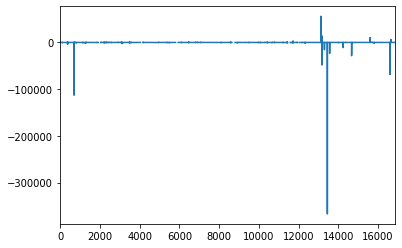

In [6]:
recovery_calculated.plot()

We still have to handle with missing value. Our value calculated revolves around zero, therefore we can replace missing values it by zero 

In [7]:
recovery_calculated.isna().sum()
recovery_calculated.fillna(0, inplace=True)
recovery_calculated.isna().sum()
recovery_calculated[np.isinf(recovery_calculated)]
recovery_calculated.replace([np.inf,-np.inf], 0, inplace=True)

Then, we will calculate the MAE between the result obtained and the features values

In [8]:
recovery_theoric= gold_train['rougher.output.recovery']
MAE_gold=abs(recovery_calculated.median()-recovery_theoric.median())/len(recovery_theoric)
MAE_gold

1.1011415775493007e-05

what we got finally is a lower error, so we can say that it adjust okey. 

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Great that you checked the formula for calculating the flotation effectiveness. However the differences is much less than calculated. Please check it once more :)
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Yes, now it's ok :)
</div>

### 1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [9]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

Many of test set are parameters type characterizing the current state of the stage. No signal of parameters names like tail ones or concentrate ones (ag, pb, sol...etc)

In [10]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant             

## There is some features from training dataset that is not represented in the test set. So if we search for the correct way to train our data, we should remove teh extra features (Ones that occurs in the training dataset) 

## We remove the features not avilable in test set and located in train dataset. we guarantee that we have the real feaures necessaries 

In [11]:
gold_test.dropna(inplace=True)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly removed the features not avilable in test set.
</div>

### 1.4. Perform data preprocessing.

Majority part of dataset is form by numerical types and there is no categorize ones at all. 

In [12]:
from sklearn.preprocessing import StandardScaler

**'gold_full'** contains all the features and the target that we need to predict. We take <br>
- **gold_test** would be our reference for our features to our models <br>
- **gold_train** would recopilate the features to be trained in our model

The first column is date and we should convert to a datetime format and then obtain, for example the seconds between dates as a way to obatin a numeric value and as a new features

In [13]:
gold_full['date']= pd.to_datetime(gold_full['date'], format= '%Y-%m-%dT%H:%M:%S')
gold_full['seconds']= gold_full['date'].dt.second
gold_full['seconds_previous']= gold_full['seconds'].shift()
gold_full['seconds_between']= gold_full['seconds'] - gold_full['seconds_previous']
del gold_full['seconds_previous']
del gold_full['seconds']

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you brought the data to the desired format.
</div>

## Step2. Analyze the data

Now we dig deeper in the datasets 

In [14]:
import matplotlib.pyplot as plt
import numpy as np

### 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

Purification stage comprises two stages and after them we got the final concentrate. First take rougher input concentrations and then divides into two outputs: secondary and primary

In [15]:
flotation = [col for col in gold_full.columns if 'rougher' in col  and 'concentrate' in col]
primary_cleaner = [col for col in gold_full.columns if 'primary_cleaner' in col and 'concentrate' in col ]
secondary_cleaner = [col for col in gold_full.columns if 'secondary_cleaner' in col and 'concentrate' in col]
final = [col for col in gold_full.columns if 'final' in col and 'concentrate' in col]

Concentrations for the final and primary concentration

In [16]:
primary_concentration= gold_full[primary_cleaner]
final_concentration= gold_full[final]
stages_concentrate= pd.concat([primary_concentration, final_concentration], join='inner', axis=1)

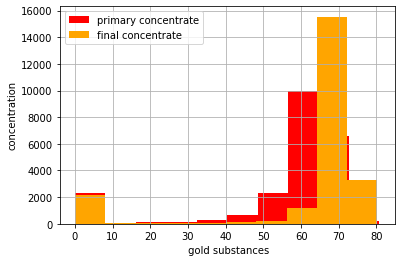

In [17]:
primary_concentration.sum(axis=1).hist(bins=10,label='primary concentrate',color='red')
final_concentration.sum(axis=1).hist(bins=10,label='final concentrate',color='orange')
plt.ylabel('concentration')
plt.xlabel(' gold substances')
plt.legend()

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
it's good that you built the graphs, but please add the axis labels to the graph. This applies to all other graphs too.
    
Please note that it's necessary to plot the change in concentration of elements has been analyzed at each stage. So please add the necessary graphs.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Well done :)
</div>

We graphically take a look at each material on different stage

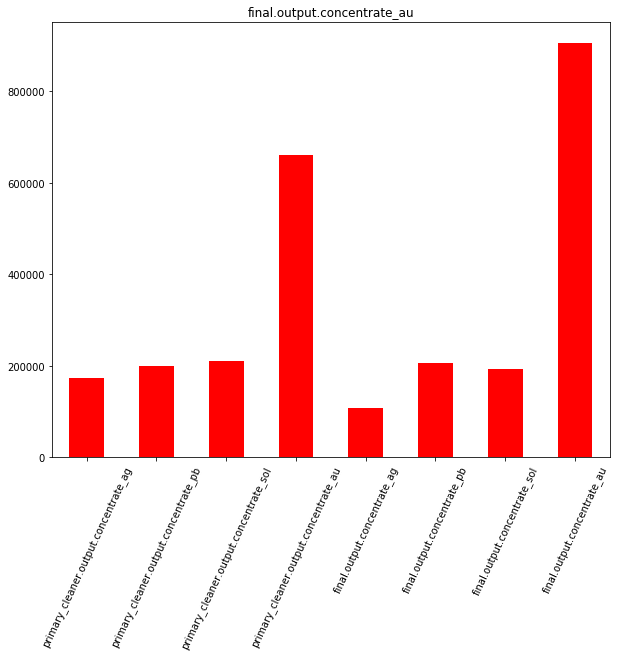

In [18]:
fig, ax1, = plt.subplots(1, figsize=(10,8))
for stage in stages_concentrate:
    stages_concentrate.sum().plot(kind='bar', subplots=True, rot=65, label=stage, color='r')

The point here is to determine which points are zero and delete from train subset

In [19]:
gold_full['total_concentrate']= gold_full[final].sum(axis=1)+gold_full[primary_cleaner].sum(axis=1)

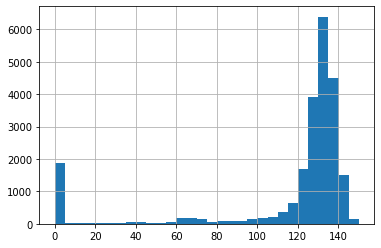

In [20]:
gold_full['total_concentrate'].hist(bins=30)

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please add the axis labels and the title to the graph.
This applies to all other graphs too.
</div>

In [21]:
index_stage_zeros= gold_full.query("total_concentrate==0").index.values
zeros= gold_train[gold_train.index.isin(index_stage_zeros)]
gold_train= gold_train.drop(zeros.index)

We create a table that resume the concentration among different satges

In [22]:
d= {'Ag': [primary_concentration['primary_cleaner.output.concentrate_ag'].mean(),final_concentration['final.output.concentrate_ag'].mean()], 'Pb': [primary_concentration['primary_cleaner.output.concentrate_pb'].mean(),final_concentration['final.output.concentrate_pb'].mean()], 'Sol': [primary_concentration['primary_cleaner.output.concentrate_sol'].mean(),final_concentration['final.output.concentrate_sol'].mean()], 'Au': [primary_concentration['primary_cleaner.output.concentrate_au'].mean(),final_concentration['final.output.concentrate_au'].mean()], 'Stage': ['primary', 'final']}
pd.DataFrame(d).set_index('Stage')

,Ag,Pb,Sol,Au
Stage,,,,
primary,7.691652,8.921110,9.573672,29.212289
final,4.781559,9.095308,8.640317,40.001172


## In the primary stage the concentration of most of substaces like  maintain similiar shape around same quantity and it occurs simlary in the final stage. The only case where increases from priamry stage to final stage it its au concentration and it is obvious cause we want to obtain more concentration 

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it’s necessary to add a conclusion for each part of the project. Please take it into account for the future. 
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

### 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

Check the null values from the dataset and eliminate them

In [23]:
rougher = [col for col in gold_full.columns if 'rougher'in col and 'input'in col ]
rougher_stage_test= gold_test[rougher]
size_feed_test= rougher_stage_test['rougher.input.feed_size']

In [24]:
rougher_stage_train= gold_train[rougher]
size_feed_train= rougher_stage_train['rougher.input.feed_size']

In [25]:
feed_comparison= pd.concat([size_feed_test, size_feed_train], join='inner', axis=1)
feed_comparison.columns=['size_test', 'size_train']
feed_comparison

,size_test,size_train
0,62.710452,55.486599
1,61.961163,57.278666
2,66.903807,57.510649
3,59.865919,57.792734
4,63.315324,56.047189
...,...,...
5851,66.758479,45.186238
5852,62.560684,45.189018
5853,73.647513,45.191797
5854,78.066446,45.194576


Graphical visualization

Text(0, 0.5, 'size')

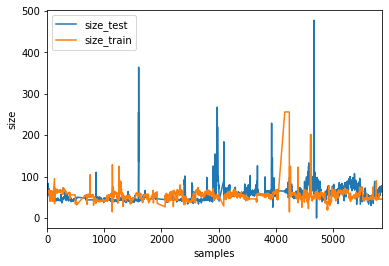

In [26]:
feed_comparison.plot()
plt.xlabel('samples')
plt.ylabel('size')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f412fcc60d0>,
      dtype=object)

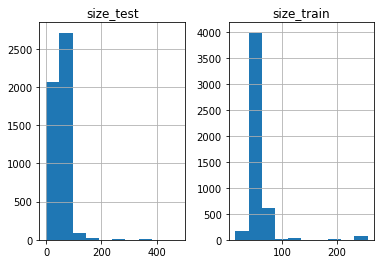

In [27]:
feed_comparison.hist()

have a look at the distribution and how its grouped in the interval 0, 100

In [28]:
print(size_feed_test.mean())
print(size_feed_train.mean())

56.3386442150923
60.18480507487947


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
The mean values of the particle size are correct. However please check graph (it looks like a normal distribution) and add labels and unit of measurement to the graph.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Yes, now it's ok :)
</div>

## We notice that there are no significant differences between the test and train datasets, so the model has done it correctly. It works correctly and just a few distant points

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check this part. There are not significant differences between the test and train datasets.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Yes, you are right!
</div>

### 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution?

Take first the index arguments for our filter

In [29]:
rougher_concentrate= [col for col in gold_full.columns if 'rougher' in col and 'concentrate' in col]
rougher_feed= [col for col in gold_full.columns if 'rougher' in col and 'feed' in col]
final_concentrate= [col for col in gold_full.columns if 'final' in col and 'concentrate' in col]

In [30]:
rougher_concentration = gold_full[rougher_concentrate]
rougher_feed_input= gold_full[rougher_feed]
final_concentration= gold_full[final_concentrate]

Analyze the rougher concentrate stage

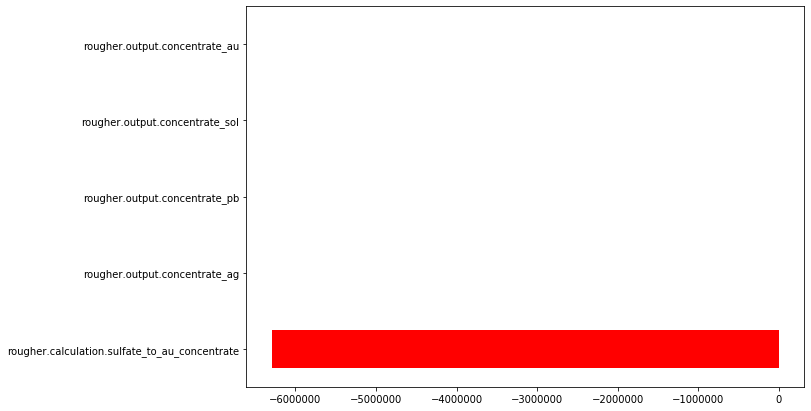

In [31]:
rougher_concentration.mean().plot.barh(color='red', figsize=(10,7))

Analyze rougher input feed

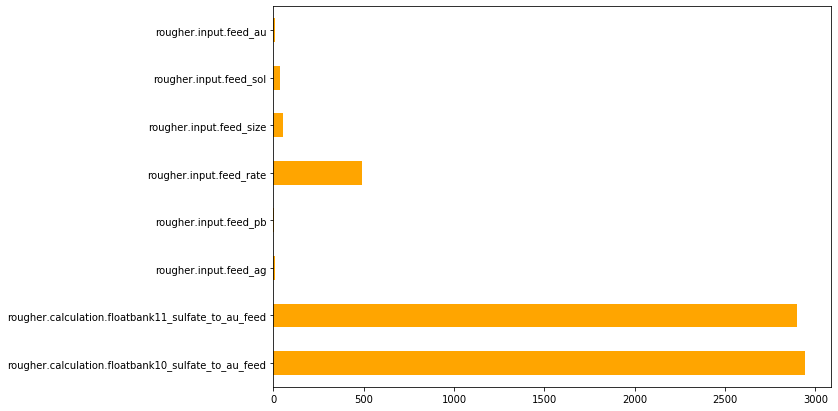

In [32]:
rougher_feed_input.median().plot.barh(color='orange', figsize=(10,7))

Analyze the final stage

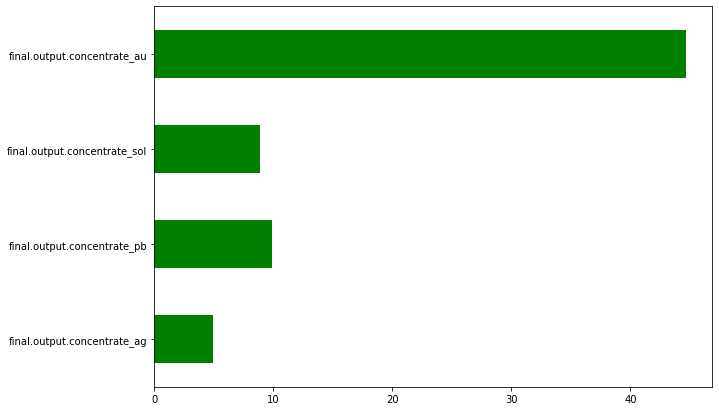

In [33]:
final_concentration.median().plot.barh(color='green', figsize=(10,7))

lets check the boxplot.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


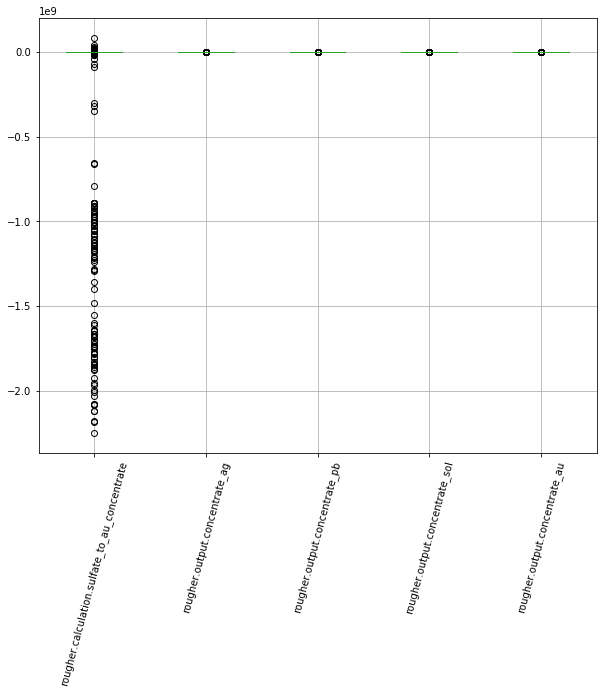

In [34]:
rougher_concentration.boxplot(figsize=(10,8), rot=75)

We realise there is a huge difference between the values from one variable in comparison with the rest and it is so negative

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


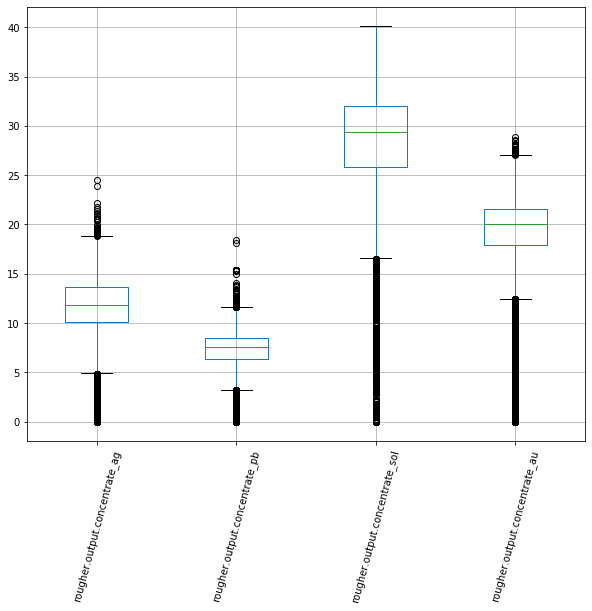

In [35]:
sample_rougher_concentration= rougher_concentration.drop(['rougher.calculation.sulfate_to_au_concentrate'], axis=1)
sample_rougher_concentration.boxplot(figsize=(10,8), rot=75)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


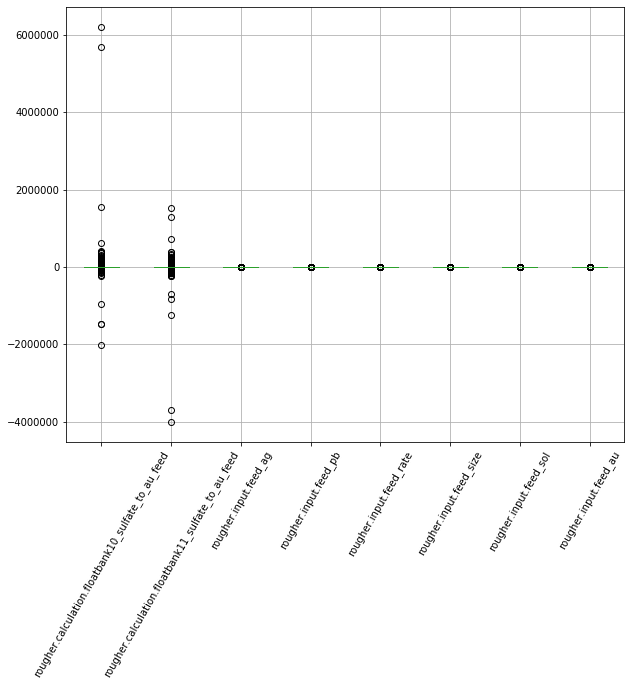

In [36]:
rougher_feed_input.boxplot(figsize=(10,8), rot=60)

 We realise that there are many strange points and goes through high negative values to high positive values

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


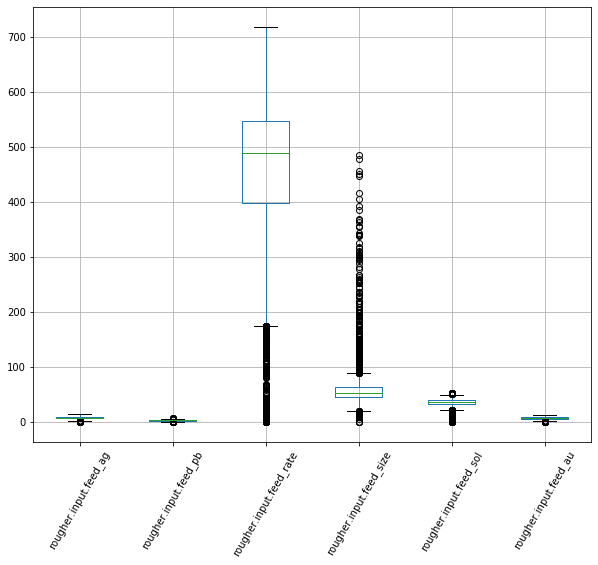

In [37]:
sample_rougher_feed_input=rougher_feed_input.drop(['rougher.calculation.floatbank10_sulfate_to_au_feed','rougher.calculation.floatbank11_sulfate_to_au_feed'], axis=1)
sample_rougher_feed_input.boxplot(figsize=(10,8), rot=60)

We need to focus on substances not sizes and rates in rougher feed stages

In [38]:
sample_rougher_feed_limit= sample_rougher_feed_input.drop(['rougher.input.feed_rate','rougher.input.feed_size'], axis=1)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


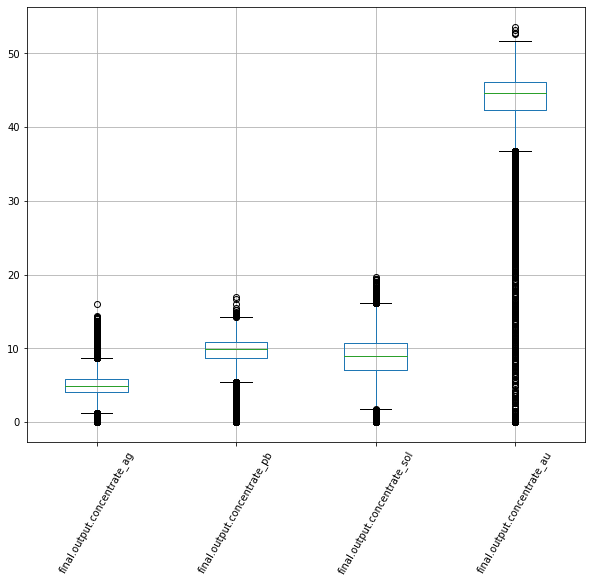

In [39]:
final_concentration.boxplot(figsize=(10,8), rot=60)

We still got abnormal values that scape from the rest of values and it is remarkable this bumps. I would eliminate this points that we found in the full data source, cause makes it impossible to study the rest of features of interest. Also, the final stage present lower level of concentations and more less grouped in a range of values. Not occurs the same with primary concentrations where there is more caos and not good fit values

We grouped all these variables of study

In [40]:
pd.concat([sample_rougher_concentration,sample_rougher_feed_limit, final_concentration], axis=1, join='inner')

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au
0,11.500771,7.101074,28.029297,19.793808,6.100378,2.284912,36.808594,6.486150,6.055403,9.889648,5.507324,42.192020
1,11.615865,7.278807,28.067063,20.050975,6.161113,2.266033,35.753385,6.478583,6.029369,9.968944,5.257781,42.701629
2,11.695753,7.216833,27.454037,19.737170,6.116455,2.159622,35.971630,6.362222,6.055926,10.213995,5.383759,42.657501
3,11.915047,7.175616,27.341277,19.320810,6.043309,2.037807,36.862241,6.118189,6.047977,9.977019,4.858634,42.689819
4,12.411054,7.240205,27.041023,19.216101,6.060915,1.786875,34.347666,5.663707,6.148599,10.142511,4.939416,42.774141
...,...,...,...,...,...,...,...,...,...,...,...,...
22711,11.124896,10.984003,30.068876,18.603550,6.091855,4.617558,37.369774,5.335862,3.224920,11.356233,6.803482,46.713954
22712,11.425983,10.888213,29.783972,18.441436,6.121323,4.144989,38.591551,4.838619,3.195978,11.349355,6.862249,46.866780
22713,8.523497,8.955135,22.786467,15.111231,5.970515,4.020002,40.074026,4.525061,3.109998,11.434366,6.886013,46.795691
22714,11.658799,10.655377,29.052742,17.834772,6.048130,3.902537,39.713906,4.362781,3.367241,11.625587,6.799433,46.408188


We create a new column where we catch the sum of all these variables about the concentrations of substances 

In [41]:
gold_full['total_stage']= gold_full[rougher_concentrate].sum(axis=1)+gold_full[final_concentrate].sum(axis=1)

Delete these rows through their index values from train and test datasets

In [42]:
gold_full['total_concentration_stage']=sample_rougher_concentration.sum(axis=1)+sample_rougher_feed_limit.sum(axis=1)+final_concentration.sum(axis=1)
gold_full[gold_full['total_concentration_stage']==gold_full['total_concentration_stage'].min()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,seconds_between,total_concentrate,total_stage,total_concentration_stage
99,2016-01-19 03:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756,0.0,0.0,652.624634,0.0
100,2016-01-19 04:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301,0.0,0.0,-1113.249700,0.0
101,2016-01-19 05:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819,0.0,0.0,-5026.304089,0.0
102,2016-01-19 06:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057,0.0,0.0,-13348.010125,0.0
103,2016-01-19 07:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,10.033820,-501.291438,7.985956,-499.934267,12.027556,-600.108918,0.0,0.0,-29798.326724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17911,2018-01-30 06:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,10.980523,-500.095725,9.041985,-499.916563,11.010581,-500.083532,0.0,0.0,-98919.612846,0.0
17912,2018-01-30 07:59:59,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,10.950164,-499.910890,9.016255,-499.821464,11.006784,-499.988820,0.0,0.0,-105771.679616,0.0
22008,2018-07-19 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,64299.274774,0.0
22009,2018-07-20 00:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,57072.484171,0.0


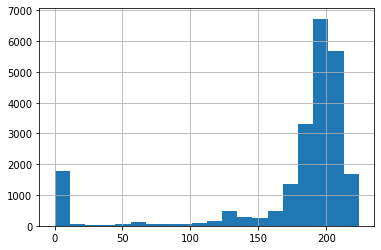

In [43]:
gold_full['total_concentration_stage'].hist(bins=20)

There is a peak of values whose concentration is 0 or close to it

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Could you please explain why we have 0 or close to it values of concentration?
</div>

In [44]:
index_concentrations_zeros= gold_full.query("total_concentration_stage==0").index.values
zeros_concentrate= gold_train[gold_train.index.isin(index_concentrations_zeros)]
gold_train= gold_train.drop(zeros_concentrate.index)

## We  figure out that there are abnormal values especially located in particular concentrations among the stages. We got most of the strange points on rougher concentratios and in product parameters.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Well done that you the median values of the features. However please try to analyse an outliers in details (plot boxplot) and make corresponding conclusions (process abnormal values). 
    
Besides please plot histograms for the total concentrations of all substances at different stages.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you plotted boxplot and described outliers on more detail.
</div>

## Step3. Build the model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We must conform our features and targets for our different models. To do this task we need to predict the model, but we have to choose a model that fits better. It is fundamental that we have two models, which will be trate separately:<br>
   1) Model 1- target: **rougher.output.recovery** <br>
   2) Model 2- target: **final.output.recovery**

Take a look that we dont have target values in our test part, so we must include it

In [46]:
target_train_rougher= gold_train['rougher.output.recovery']
target_train_final = gold_train['final.output.recovery']

gold_test_target=pd.concat([gold_test, gold_full[['rougher.output.recovery','final.output.recovery']]], axis=1, join='inner')
gold_test_target.fillna(method='ffill', inplace=True)
target_test_rougher= gold_test_target['rougher.output.recovery']
target_test_final = gold_test_target['final.output.recovery']

We assume for our features the ones located in the test dataset

In [47]:
gold_train=gold_train[gold_test_target.columns]

Now, we can separate the target from the features and make a good preprocessing for linear models. Set the features definitely 

In [48]:
features_train = gold_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = gold_test_target.drop( ['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)

### 3.1. Write a function to calculate the final sMAPE value.

Build a function that calculates sMAPE

In [49]:
def smape(target, predict):
    SMAPE= np.mean(np.abs(target-predict)/ ((np.abs(target)+np.abs(predict))/2))*100
    return SMAPE

Then the final scorer sMAPE for both models

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent your sMAPE function is correct :)
</div>

### 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

This factory function wraps scoring functions for use in GridSearchCV and cross_val_score.

In [50]:
from sklearn.metrics import make_scorer
smape_scorer = make_scorer(smape, greater_is_better=False)

Pick the best parameters for this model and evaluate the model using Cross-validation with the smape metric. Use Cross-validation for the train set for rougher state

In [51]:
from sklearn.model_selection import cross_val_score
import numpy as np
state = np.random.RandomState(12345)

Split the model into three parts and tunning the hyperparameters 

#### Tunning hyperparameters RandomForestRegressor

Standarize the features for the Random Forest regressor

In [52]:
scaler = StandardScaler()
features_train_scale = scaler.fit_transform(features_train)
features_test_scale = scaler.fit_transform(features_test) 

Model rougher stage

In [ ]:
param_best= {"smape":0 ,"n_estimators": None}
for estimator in range(10, 30, 10):
        random_forest = RandomForestRegressor(random_state=state, n_estimators= estimator)
        random_forest.fit(features_train, target_train_rougher)
        
        smape_scorer = make_scorer(smape, greater_is_better=False)
        rougher_smape_train = np.abs(cross_val_score(random_forest, features_train_scale, target_train_rougher.values.flatten(),scoring = smape_scorer, cv=10)).sum()/len(cross_val_score(random_forest, features_train_scale, target_train_rougher.values.flatten() , scoring = smape_scorer, cv=10))
        
        if rougher_smape_train > param_best["smape"]:
            param_best["n_estimators"]= estimator
            param_best["smape"]= rougher_smape_train

print("best smape, n_estimators: ", param_best)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it's necessary to prepare data before the train of the model (preprocess NaN values).
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

Model final stage

In [ ]:
param_best= {"smape":0 ,"n_estimators": None}
for estimator in range(10, 30, 10):
        random_forest = RandomForestRegressor(random_state=state, n_estimators= estimator)
        random_forest.fit(features_train, target_train_final)
        
        smape_scorer = make_scorer(smape, greater_is_better=False)
        rougher_smape_train = np.abs(cross_val_score(random_forest, features_train_scale, target_train_final.values.flatten(),scoring = smape_scorer, cv=10)).sum()/len(cross_val_score(random_forest, features_train_scale, target_train_final.values.flatten() , scoring = smape_scorer, cv=10))
        
        if rougher_smape_train > param_best["smape"]:
            param_best["n_estimators"]= estimator
            param_best["smape"]= rougher_smape_train

print("best smape, n_estimators, max_depth parameters: ", param_best)

#### Test the model

In [ ]:
random_forest = RandomForestRegressor(random_state=state, n_estimators= 10)
random_forest.fit(features_train, target_train_rougher)
rougher_smape_train = np.abs(cross_val_score(random_forest, features_test_scale, target_test_rougher.values.flatten(),scoring = smape_scorer, cv=5)).sum()/len(cross_val_score(random_forest, features_test_scale, target_test_rougher.values.flatten() , scoring = smape_scorer, cv=5))

In [ ]:
random_forest = RandomForestRegressor(random_state=state, n_estimators= 10)
random_forest.fit(features_train, target_train_final)
final_smape_train = np.abs(cross_val_score(random_forest, features_test_scale, target_test_final.values.flatten(), 
        scoring = smape_scorer, cv=10)).sum()/len(cross_val_score(random_forest,features_test_scale, target_test_final.values.flatten() , scoring = smape_scorer, cv=10))

In [ ]:
final_sMAPE= 0.25*rougher_smape_train+0.75*final_smape_train
final_sMAPE

#### Linear regression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(features_train_scale, target_train_final)
rougher_smape_lr = np.abs(cross_val_score(linear_reg, features_train_scale, target_train_final.values.flatten(), 
        scoring = smape_scorer, cv=10)).sum()/len(cross_val_score(linear_reg, features_test_scale, target_test_final.values.flatten() , scoring = smape_scorer, cv=10))

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(features_train_scale, target_train_rougher)
final_smape_lr = np.abs(cross_val_score(linear_reg, features_train_scale, target_train_rougher.values.flatten(), 
        scoring = smape_scorer, cv=10)).sum()/len(cross_val_score(linear_reg, features_test_scale, target_test_rougher.values.flatten() , scoring = smape_scorer, cv=10))

In [ ]:
final_sMAPE2= 0.25*rougher_smape_lr+0.75*final_smape_lr
final_sMAPE2

In [ ]:
d= {'linearRegression':[rougher_smape_lr, final_smape_lr, final_sMAPE], 'RandomForestRegressor': [rougher_smape_train, final_smape_train, final_sMAPE2], 'Stage': ['rougher', 'final', 'final_sMAPE']}
pd.DataFrame(d).set_index('Stage')

for this task median is very strong baseline and project authors were able to overcome this baseline just a bit

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
A really great analysis.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please add a general conclusion. It's important part of the project which contains all main findings.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 4:
    
An excellent conclusion which highlights all the main results of the project. 
</div>

## Conclusion

We can conclue that there is no reason to take to the model the conentrations of some features cause it will have no impact in our model and indeed it is reasonable to point on substances where we got high level's of concentration and inluence on the model. As we see, the best model that predicts better is the linear regression model.